In [1]:
import os
from collections import defaultdict
import pickle

import numpy as np
import matplotlib.pyplot as plt

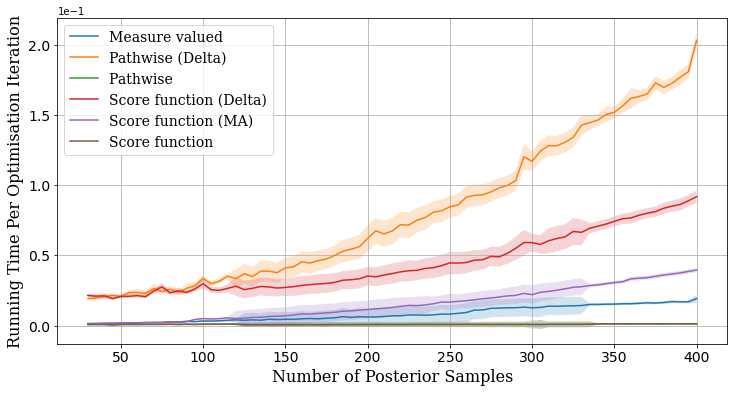

In [24]:
def remove_outliers(arr):
    arr = np.array(arr)
    return arr[np.logical_and(np.percentile(arr, 2.5) <= arr, arr <= np.percentile(arr, 97.5))]

results_dir = 'results'
legend_mapping = {
    'score_function': 'Score function',
    'pathwise': 'Pathwise',
    'measure_valued': 'Measure valued',
    'moving_avg': '(MA)',
    'delta': '(Delta)',
    'none': ''
}

avg_times = defaultdict(lambda: defaultdict(list))
std_times = defaultdict(lambda: defaultdict(list))

for n_dir in os.listdir(results_dir):
    n = int(n_dir.replace('N-', ''))
    n_dir = f'{results_dir}/{n_dir}'

    for estimator_dir in os.listdir(n_dir):
        estimator = estimator_dir.replace('estimator-', '')
        estimator_dir = f'{n_dir}/{estimator_dir}'
    
        for cv_dir in os.listdir(estimator_dir):
            cv = cv_dir.replace('cv-', '')
            cv_dir = f'{estimator_dir}/{cv_dir}'
    
            with open(f'{cv_dir}/times.pkl', 'rb') as f:
                run_times = remove_outliers(pickle.load(f))
            
            key = legend_mapping[estimator] + f' {legend_mapping[cv]}'
            avg_times[key][n] = np.mean(run_times)
            std_times[key][n] = np.std(run_times)

fig, axs = plt.subplots(1, 1, figsize=(12, 6))
fontdict = {'font':'serif', 'size':16}

z_score = 1.
for exp in avg_times:
    ns = sorted(list(avg_times[exp].keys()))
    avg = [avg_times[exp][n] for n in ns]
    plt.plot(ns, avg, label=exp)
    std = [std_times[exp][n] for n in ns]
    avg, std = map(np.array, (avg, std))
    plt.fill_between(ns, avg-z_score*std, avg+z_score*std, alpha=0.2)

plt.xlabel('Number of Posterior Samples', fontdict=fontdict)
plt.ylabel('Running Time Per Optimisation Iteration', fontdict=fontdict)
plt.xticks(fontsize=14); plt.yticks(fontsize=fontdict['size']-2)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.grid()
plt.legend(prop={'family':fontdict['font'],'size':fontdict['size']-2})
plt.show()